In [46]:
import cv2
import utils
import matplotlib.pyplot as plt

In [45]:
class PipeItem(object):
    
    def __init__(self, item, **kwargs):
        self.item = item
        self.kwargs = kwargs
        
    def run(self, image):
        return self.item(image, **self.kwargs)

In [36]:
pipeline = [
    PipeItem(utils.dehaze),
    PipeItem(utils.gamma, gamma=1.8),
    PipeItem(utils.kernel, kernel=[[1,1,1],[1,20,1],[1,1,1]]),
    PipeItem(utils.clahe),
]

In [64]:
def run_pipeline(image, pipeline, display_steps=False):
    temp = cv2.imread(image)
    for item in pipeline:
        if display_steps:
            plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
            plt.show()
        temp = item.run(temp)
    if display_steps:
        plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    return temp

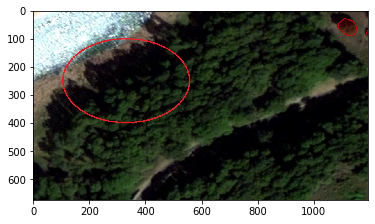

{}


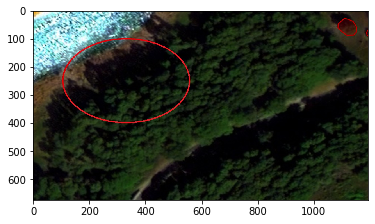

{'gamma': 1.8}


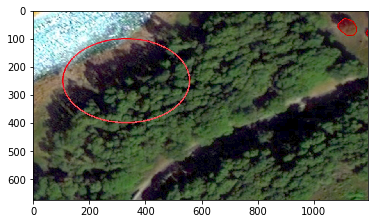

{'kernel': [[1, 1, 1], [1, 20, 1], [1, 1, 1]]}


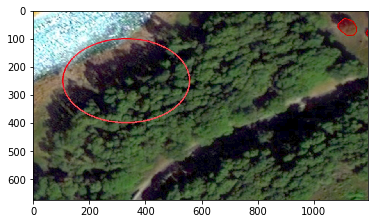

{}


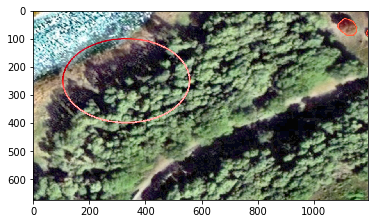

In [65]:
output = run_pipeline('../imgs/sample_image.jpg', pipeline, True)